In [27]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2 as c
from PIL import Image
from dnn_app_utils_v2_perceptron import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


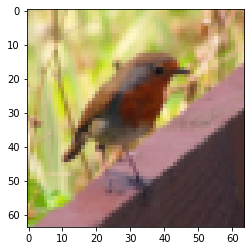

In [29]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [30]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Numero de ejemplos de entrenamiento: " + str(m_train))
print ("Numero de ejemplos de prueba: " + str(m_test))
print ("Tamaño de cada imagen: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("Forma x del conjunto de entrenamiento: " + str(train_x_orig.shape))
print ("Forma y del conjunto de entrenamiento: " + str(train_y.shape))
print ("Forma x del conjunto de prueba: " + str(test_x_orig.shape))
print ("Forma y del conjunto de prueba: " + str(test_y.shape))

Numero de ejemplos de entrenamiento: 209
Numero de ejemplos de prueba: 50
Tamaño de cada imagen: (64, 64, 3)
Forma x del conjunto de entrenamiento: (209, 64, 64, 3)
Forma y del conjunto de entrenamiento: (1, 209)
Forma x del conjunto de prueba: (50, 64, 64, 3)
Forma y del conjunto de prueba: (1, 50)


In [31]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("Dimensiones del conjunto de entrenamiento x: " + str(train_x.shape))
print ("Dimensiones del conjunto de prueba x: " + str(test_x.shape))

Dimensiones del conjunto de entrenamiento x: (12288, 209)
Dimensiones del conjunto de prueba x: (12288, 50)


In [32]:
n_x = 12288
n_h = 1

layers_dims = (n_x, n_h)

In [33]:
def perceptron(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h) = layers_dims
    parameters = initialize_parameters(n_x, n_h)
    W1 = parameters["W1"]
    b1 = parameters["b1"]

    for i in range(0, num_iterations):
        A0, cache1 = linear_activation_forward(X, W1, b1, 'sigmoid')

        cost = compute_cost(A0, Y)
        dA0 = - (np.divide(Y, A0) - np.divide(1 - Y, 1 - A0))
        
        dA0, dW1, db1 = linear_activation_backward(dA0, cache1, 'sigmoid')

        grads['dW1'] = dW1
        grads['db1'] = db1
        
        parameters = update_parameters(parameters, grads, learning_rate)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        
        if print_cost and i % 100 == 0:
            print("Costo después de la iteración {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('costo')
    plt.xlabel('iteraciones (x0.01)')
    plt.title("Tasa de aprendizaje =" + str(learning_rate))
    plt.show()
    
    return parameters

Costo después de la iteración 0: 0.849280555793836
Costo después de la iteración 100: 0.5399341879579264
Costo después de la iteración 200: 0.6134253315083998
Costo después de la iteración 300: 0.5172280312776245
Costo después de la iteración 400: 0.4168941233395394
Costo después de la iteración 500: 0.31873543703028473
Costo después de la iteración 600: 0.23429239354607442
Costo después de la iteración 700: 0.19346997821885192
Costo después de la iteración 800: 0.17891465035062806
Costo después de la iteración 900: 0.16678813891426292
Costo después de la iteración 1000: 0.15622990384888039
Costo después de la iteración 1100: 0.14690648472555773
Costo después de la iteración 1200: 0.13859775020750814
Costo después de la iteración 1300: 0.13114209311100938
Costo después de la iteración 1400: 0.12441395692205301
Costo después de la iteración 1500: 0.11831259882703889
Costo después de la iteración 1600: 0.11275553793534504
Costo después de la iteración 1700: 0.10767429662938623
Costo desp

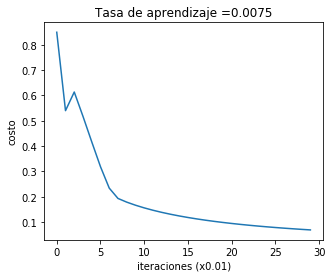

In [34]:
parameters = perceptron(train_x, train_y, layers_dims = (n_x, n_h), num_iterations = 3000, print_cost=True)

In [35]:
predictions_train = predict(train_x, train_y, parameters)

Probas: 0.11369873295779691
Probas: 0.04229865429051021
Probas: 0.9537092235878215
Probas: 1.716376888450371e-05
Probas: 0.017427270507688483
Probas: 0.056129919966360006
Probas: 0.014624182922444351
Probas: 0.9542378664905206
Probas: 0.04031801639931056
Probas: 0.028740188170873083
Probas: 0.056977688710289964
Probas: 0.8791134972510095
Probas: 0.13879723562913068
Probas: 0.9689498399056063
Probas: 0.851320922769761
Probas: 0.024553839329691844
Probas: 0.008262425466634405
Probas: 0.02220892813760503
Probas: 0.04456190278903778
Probas: 0.9665716118286479
Probas: 0.005084739494880545
Probas: 0.01759187963136316
Probas: 0.12179747995096794
Probas: 0.02176667688982472
Probas: 0.9379037003492304
Probas: 0.9249868243377523
Probas: 0.019387435036294032
Probas: 0.9183219819381714
Probas: 0.02304202140085143
Probas: 0.8550593962009571
Probas: 0.0500552932410863
Probas: 0.04083976909486637
Probas: 0.10283084822864359
Probas: 0.11106114879568015
Probas: 0.04425848988245181
Probas: 0.01198720293

In [36]:
predictions_test = predict(test_x, test_y, parameters)

Probas: 0.9747690386184377
Probas: 0.9352243472242419
Probas: 0.9232618433041447
Probas: 0.9722639336373232
Probas: 0.7970379124750228
Probas: 0.5038028190435458
Probas: 0.009005072563032346
Probas: 0.8906095459306633
Probas: 0.8842542461527889
Probas: 0.752566878305727
Probas: 0.1655717442854226
Probas: 0.3790382879469363
Probas: 0.7751368034297135
Probas: 0.8679585756740849
Probas: 0.002657360046854232
Probas: 0.9628308654580687
Probas: 0.00988052684809775
Probas: 0.9229327372404049
Probas: 0.13513128614144282
Probas: 0.009538903915095705
Probas: 0.9770801095200804
Probas: 0.1016707899810708
Probas: 0.0033439501579477426
Probas: 0.8974502326405109
Probas: 0.4656997999032727
Probas: 0.629627364773472
Probas: 0.8788844220333298
Probas: 0.0027028549011424755
Probas: 0.008595653446412698
Probas: 0.9993761956646452
Probas: 0.08534249381367102
Probas: 0.8220447358108783
Probas: 0.679679530588514
Probas: 0.507198061127957
Probas: 0.6936388634569806
Probas: 0.01135439567520935
Probas: 0.0301

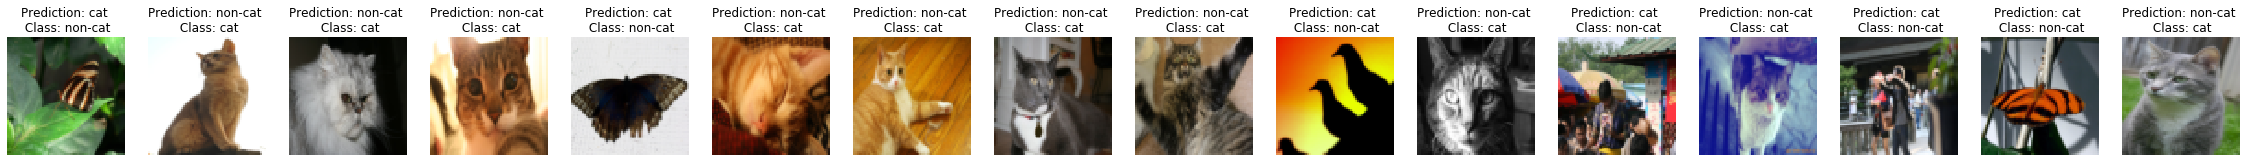

In [37]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

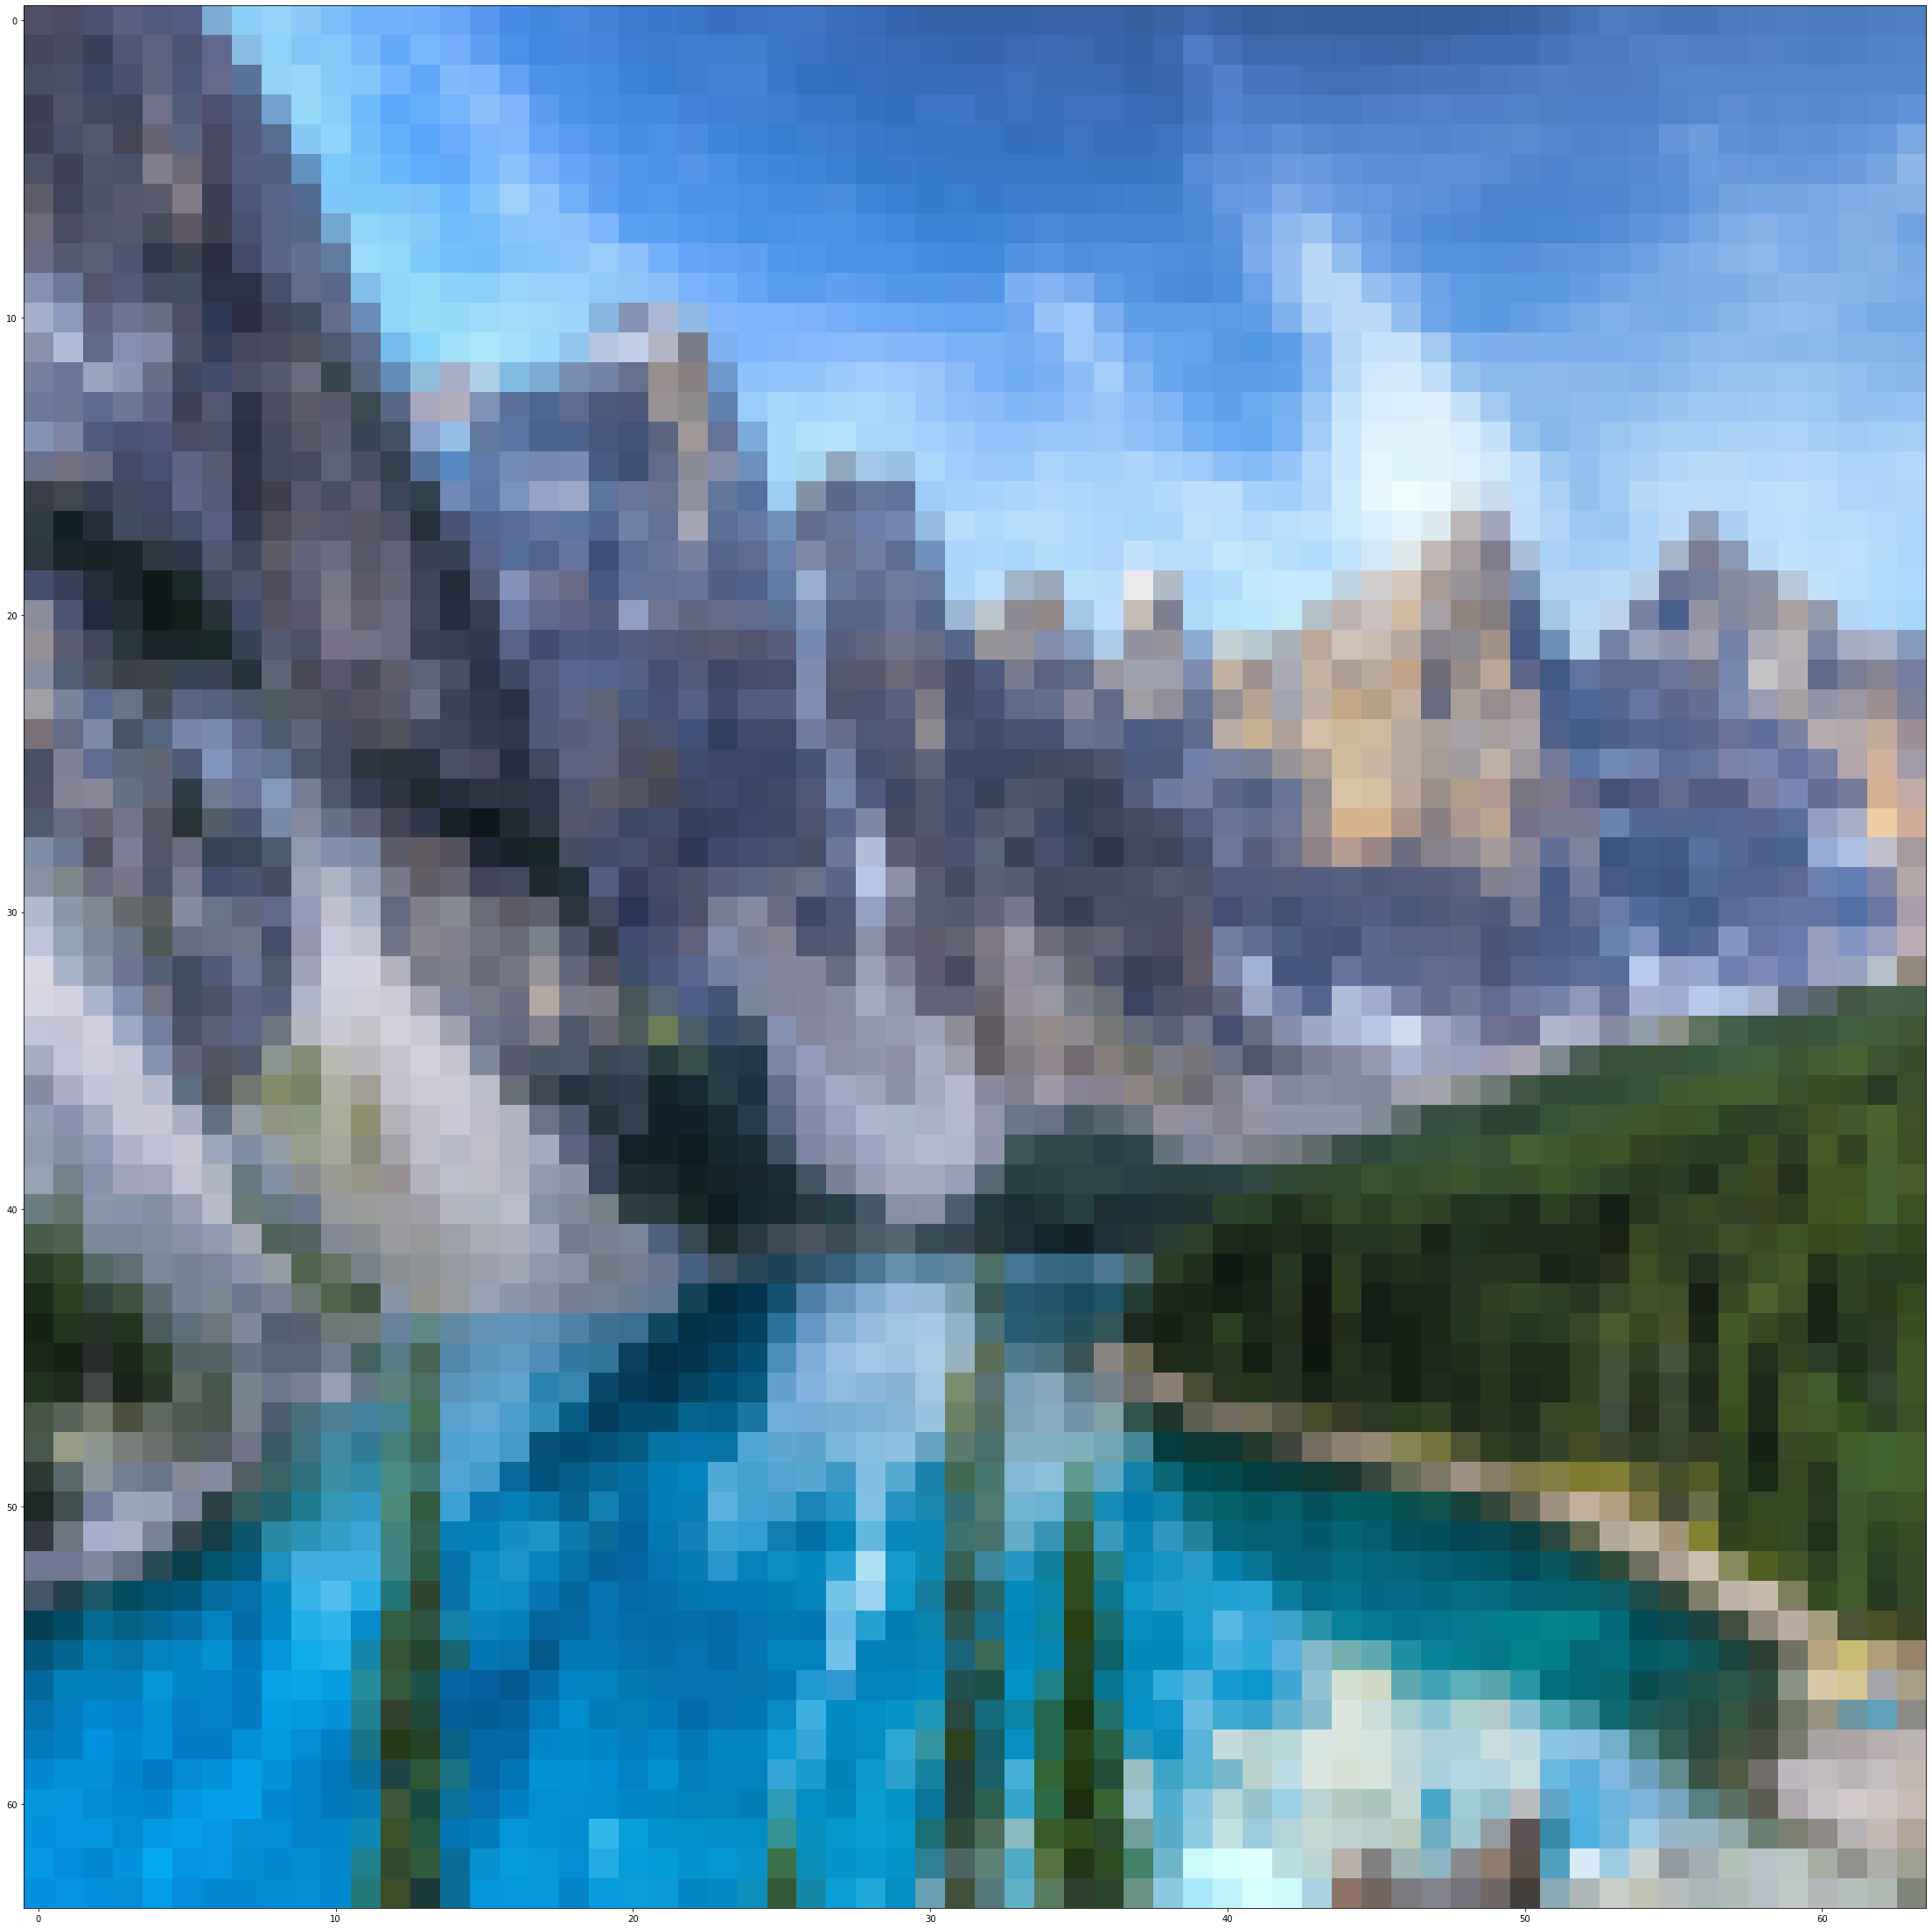

In [40]:
my_image = "landscape.jpg"
my_label_y = [1]

fname = "images/" + my_image
image = np.array(c.imread(fname, c.IMREAD_COLOR))
image = c.cvtColor(image, c.COLOR_BGR2RGB)
size=(num_px,num_px)
my_image = c.resize(image, size, interpolation = c.INTER_AREA)
plt.imshow(my_image)

Probas: 0.19043158001781882
Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


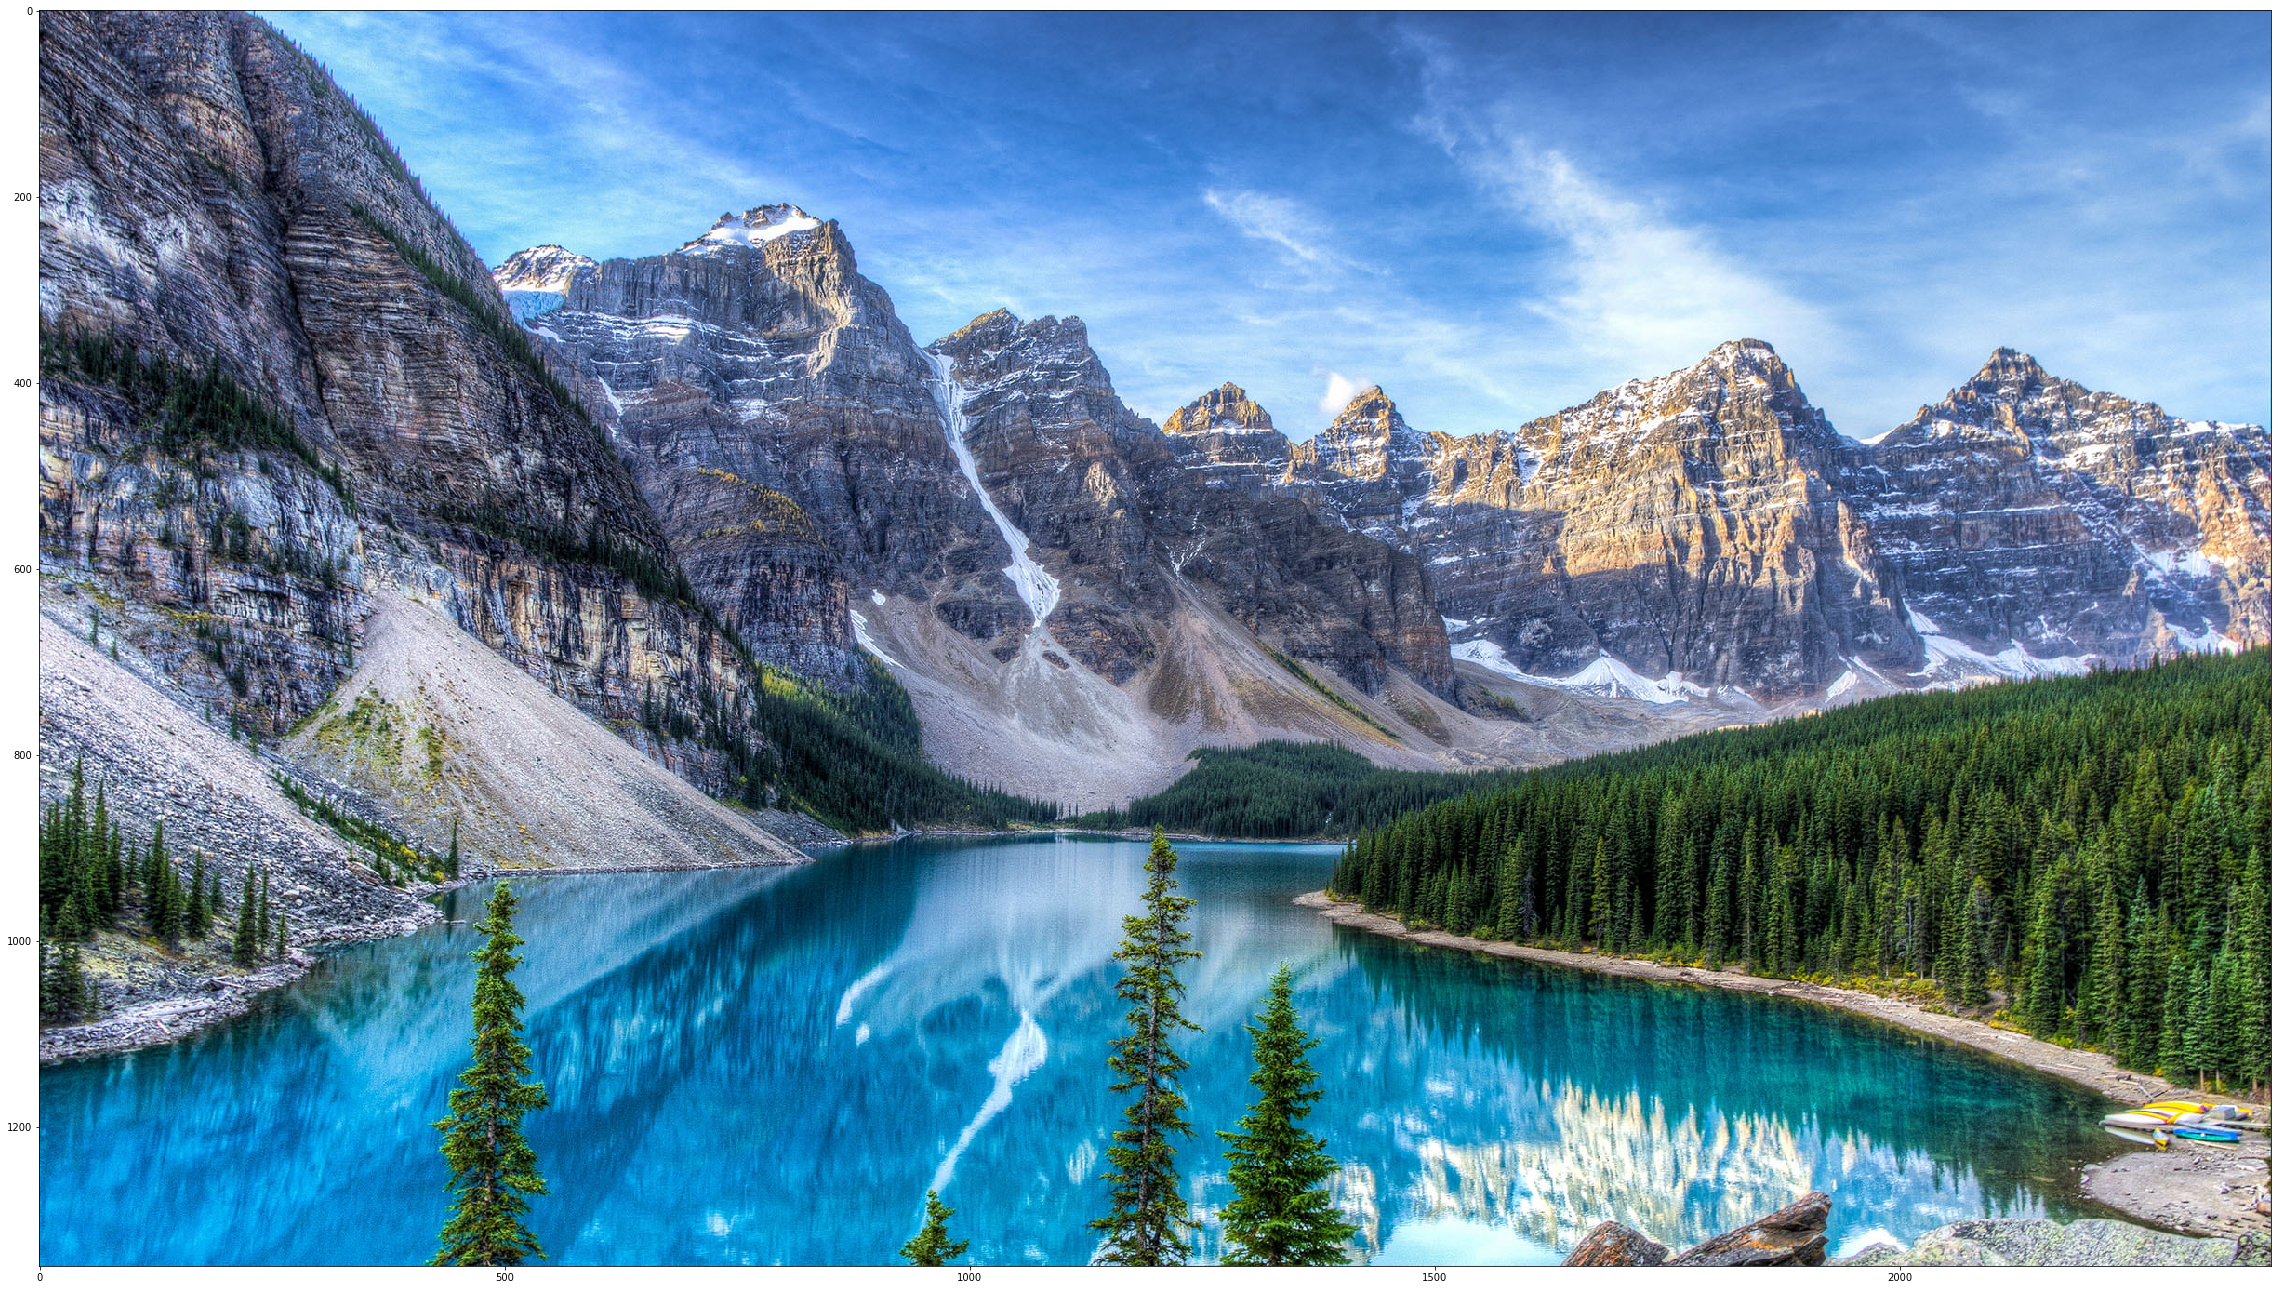

In [41]:
my_image = my_image.reshape((num_px*num_px*3,1))/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")